## 1. Importing the libraries

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

## 2. Import data

In [2]:
beml_data = pd.read_csv('BEML.csv')
beml_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [3]:
glaxo_data = pd.read_csv('GLAXO.csv')
glaxo_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


## 3. Initial Analysis

In [4]:
glaxo_data.shape,beml_data.shape

((1739, 8), (1739, 8))

In [5]:
glaxo_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
beml_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## 4. Data Preparation

##### Filtering the data for our analysis

In [7]:
glaxo_close_price = glaxo_data[['Date','Close']]
beml_close_price  = beml_data[['Date','Close']]

In [9]:
glaxo_close_price.head()

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80


In [10]:
beml_close_price.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


#### Understanding Glaxo's Close Price fluctuation

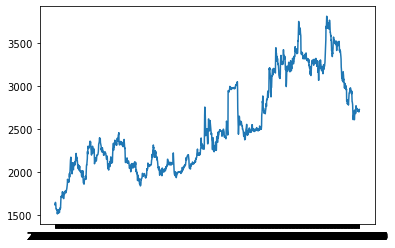

In [12]:
plt.plot(glaxo_close_price['Date'],glaxo_close_price['Close'])

##### Understanding BEML's Close Price fluctuation

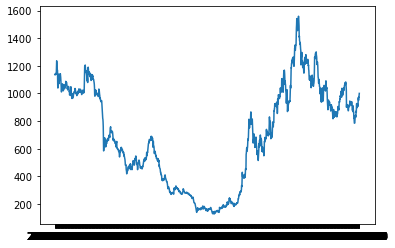

In [13]:
plt.plot(beml_close_price['Date'],beml_close_price['Close'])

#### Observation

###### X-axis is not clearly visible because of the datatype it has. It should in time format but it is in object.

In [14]:
beml_close_price.dtypes

Date      object
Close    float64
dtype: object

In [15]:
glaxo_close_price.dtypes

Date      object
Close    float64
dtype: object

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
beml_close_price['Date']  = pd.to_datetime(beml_close_price['Date'])
glaxo_close_price['Date'] = pd.to_datetime(glaxo_close_price['Date'])

In [20]:
beml_close_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [21]:
glaxo_close_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Text(0, 0.5, 'Close Price')

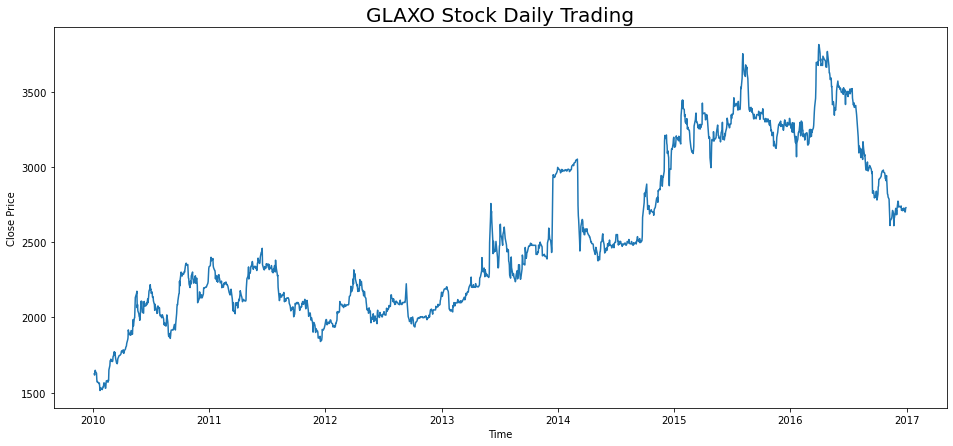

In [28]:
plt.figure(figsize = (16,7))
plt.plot(glaxo_close_price['Date'],glaxo_close_price['Close'])
plt.title('GLAXO Stock Daily Trading',size = 20)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

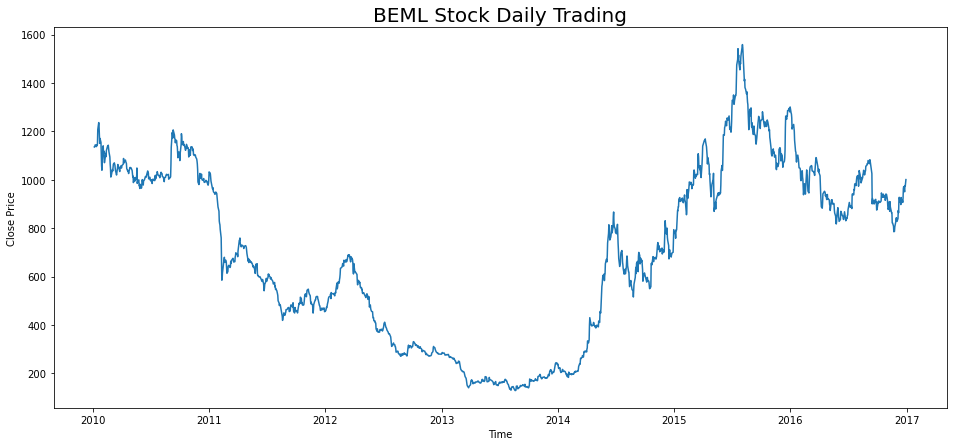

In [29]:
plt.figure(figsize = (16,7))
plt.plot(beml_close_price['Date'],beml_close_price['Close'])
plt.title('BEML Stock Daily Trading',size = 20)
plt.xlabel('Time')
plt.ylabel('Close Price')

### Understanding Gain Percentage

In [31]:
glaxo_close_price['Gain'] = glaxo_close_price['Close'].pct_change(periods=1)
beml_close_price['Gain']  = beml_close_price['Close'].pct_change(periods=1)

In [32]:
glaxo_close_price

,Date,Close,Gain
0,2010-01-04,1625.65,NaN
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
...,...,...,...
1734,2016-12-26,2723.50,-0.001283
1735,2016-12-27,2701.75,-0.007986
1736,2016-12-28,2702.15,0.000148
1737,2016-12-29,2727.90,0.009529


In [33]:
beml_close_price

,Date,Close,Gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
...,...,...,...
1734,2016-12-26,950.25,-0.021924
1735,2016-12-27,975.70,0.026782
1736,2016-12-28,974.40,-0.001332
1737,2016-12-29,986.05,0.011956


#### Data Cleaning

In [40]:
glaxo_close_price.dropna(axis = 0, inplace=True)
beml_close_price.dropna(axis = 0, inplace = True)

In [41]:
glaxo_close_price

,Date,Close,Gain
1,2010-01-05,1616.80,-0.005444
2,2010-01-06,1638.50,0.013422
3,2010-01-07,1648.70,0.006225
4,2010-01-08,1639.80,-0.005398
5,2010-01-11,1629.45,-0.006312
...,...,...,...
1734,2016-12-26,2723.50,-0.001283
1735,2016-12-27,2701.75,-0.007986
1736,2016-12-28,2702.15,0.000148
1737,2016-12-29,2727.90,0.009529


In [42]:
beml_close_price

,Date,Close,Gain
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
5,2010-01-11,1137.00,-0.006162
...,...,...,...
1734,2016-12-26,950.25,-0.021924
1735,2016-12-27,975.70,0.026782
1736,2016-12-28,974.40,-0.001332
1737,2016-12-29,986.05,0.011956


#### Understanding the gain of GLAXO stock

Text(0, 0.5, '% of Gain')

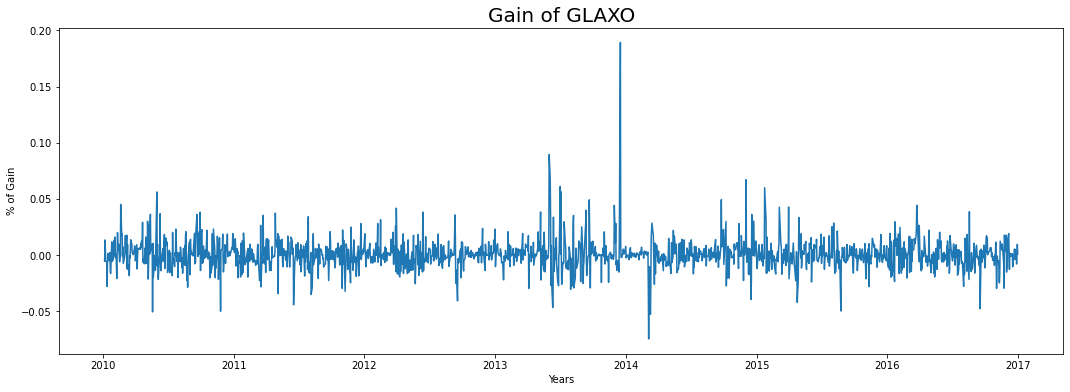

In [48]:
plt.figure(figsize=(18,6))
plt.plot(glaxo_close_price['Date'],glaxo_close_price['Gain'])
plt.title('Gain of GLAXO',size = 20)
plt.xlabel('Years')
plt.ylabel('% of Gain')

#### Understanding the gain of BEML stock

Text(0, 0.5, '% of Gain')

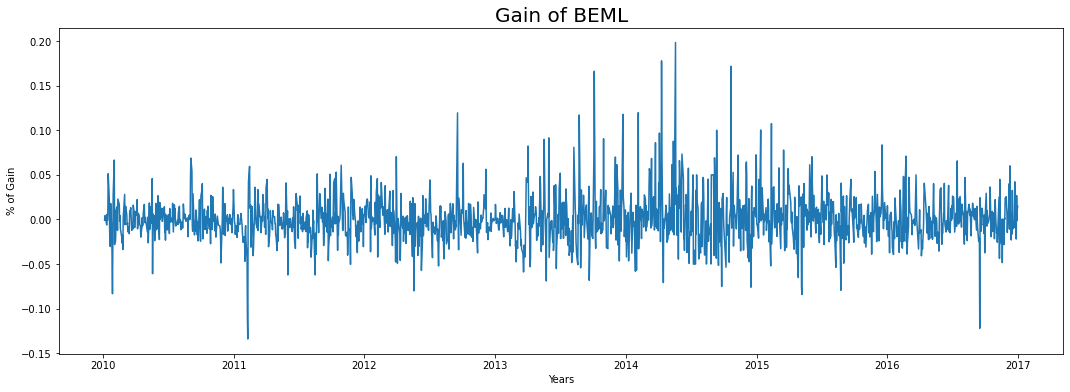

In [49]:
plt.figure(figsize=(18,6))
plt.plot(beml_close_price['Date'],beml_close_price['Gain'])
plt.title('Gain of BEML',size = 20)
plt.xlabel('Years')
plt.ylabel('% of Gain')

### Reflections Questions

#### 1. What is the probability of making 2% loss or higher in Glaxo?

In [50]:
from scipy import stats

In [57]:
#round(glaxo_close_price['Gain'].mean(),4)
round(glaxo_close_price['Gain'].std(),4)

0.0134

In [58]:
stats.norm.cdf(x = - 0.02, loc =  round(glaxo_close_price['Gain'].mean(),4), scale = round(glaxo_close_price['Gain'].std(),4))
#There is 6% chance that if any investor invests on GLAXO, he will be lose 2% or more than 2% of the total money he/she invested.

0.06395593743937553

#### 2. What is the probability of making 2% loss or higher in BEML?

In [59]:
stats.norm.cdf(x = - 0.02, loc =  round(beml_close_price['Gain'].mean(),4), scale = round(beml_close_price['Gain'].std(),4))
#There is 22% chance that if any investor invests on BEML, he will be lose 2% or more than 2% of the total money he/she invested.

0.22096464496279805

#### 3. What is the Probability of making 2% gain or higher in Glaxo?

In [60]:
1 - stats.norm.cdf(x = 0.02, loc =  round(glaxo_close_price['Gain'].mean(),4), scale = round(glaxo_close_price['Gain'].std(),4))
#There is 7% chance that if any investor invests on GLAXO, he will be gain 2% or more than 2% of the total money he/she invested.

0.07177658173190637

#### 4. What is the probability of making 2% gain or higher in BEML: 

In [61]:
1 - stats.norm.cdf(x =  0.02, loc =  round(beml_close_price['Gain'].mean(),4), scale = round(beml_close_price['Gain'].std(),4))
#There is 22.77% chance that if any investor invests on BEML, he will be gain 2% or more than 2% of the total money he/she invested.

0.2277696435431158

### WELL DONE !!!